Нурлан, рад приветствовать тебя)

Меня зовут Александр Дьяченко и этот проект у тебя буду проверять я.  
Предлагаю общаться на "ты", если это для тебя приемлемо)  

В твоей работе я оставлю некоторые комментарии, которые помогут лучше понять материал или скажу, что все сделано верно.  
Давай договоримся об условных обозначениях, чтобы наше общение было эффективнее:  

Комментарии будут в <font color='green'>зеленой ✔️</font>, <font color='orange'>оранжевой ⚠️</font> или <font color='red'>красной ❌</font> рамках:


<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Успех ✔️</b>
       
Зеленым цветом помечены образцовые решения. Которые можно использовать в дальнейшем.
    
</div>

<div class="alert alert-block alert-warning"; style="border-left: 6px solid orange">
<b>Рекомендация ⚠️</b>
       
Желтым цветом отмечено то, что ты можешь улучшить или доработать. Можешь учесть это при выполнении следующих работ или доработать проект сейчас, но это не обязательно.
    
</div>

<div class="alert alert-block alert-danger"; style="border-left: 6px solid red">
<b>Ошибка ❌</b>
       
Красным цветом помечены моменты, которые необходимо доработать, чтобы проект был принят. Уверен, что у тебя все получится. Буду ждать твою работу на повторное ревью.
    
</div>

-------------------

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Свои комментарии и вопросы ты можешь оставлять в синей рамочке. Также используй её, если что-то исправил, доделал или полностью переписал.</div>




Старайся отвечать на мои рекомендации и не удалять комментарии, так получится проверить работу быстрее)

Погнали!



-------

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Подготовка данных

In [77]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics

In [48]:
cars = pd.read_csv(r'/datasets/autos.csv')
cars.head(5)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [49]:
print(cars.info())
print(cars.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [50]:
# заполнение пропущенных значений
display(cars[cars['VehicleType'].isna()])
cars['VehicleType'] = cars['VehicleType'].fillna('unknown')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
16,2016-04-01 12:46:46,300,NaN,2016,NaN,60,polo,150000,0,petrol,volkswagen,NaN,2016-04-01 00:00:00,0,38871,2016-04-01 12:46:46
22,2016-03-23 14:52:51,2900,NaN,2018,manual,90,meriva,150000,5,petrol,opel,no,2016-03-23 00:00:00,0,49716,2016-03-31 01:16:33
26,2016-03-10 19:38:18,5555,NaN,2017,manual,125,c4,125000,4,NaN,citroen,no,2016-03-10 00:00:00,0,31139,2016-03-16 09:16:46
31,2016-03-29 16:57:02,899,NaN,2016,manual,60,clio,150000,6,petrol,renault,NaN,2016-03-29 00:00:00,0,37075,2016-03-29 17:43:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354346,2016-03-07 17:06:35,2600,NaN,2005,auto,0,c_klasse,150000,9,NaN,mercedes_benz,NaN,2016-03-07 00:00:00,0,61169,2016-03-08 21:28:38
354351,2016-03-11 23:40:32,1900,NaN,2000,manual,110,NaN,150000,7,NaN,volkswagen,no,2016-03-11 00:00:00,0,87700,2016-03-12 14:16:51
354361,2016-03-09 13:37:43,5250,NaN,2016,auto,150,159,150000,12,NaN,alfa_romeo,no,2016-03-09 00:00:00,0,51371,2016-03-13 01:44:13
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49


In [51]:
display(cars[cars['Gearbox'].isna()])
cars['Gearbox'] = cars['Gearbox'].fillna('unknown')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
15,2016-03-11 21:39:15,450,small,1910,NaN,0,ka,5000,0,petrol,ford,NaN,2016-03-11 00:00:00,0,24148,2016-03-19 08:46:47
16,2016-04-01 12:46:46,300,unknown,2016,NaN,60,polo,150000,0,petrol,volkswagen,NaN,2016-04-01 00:00:00,0,38871,2016-04-01 12:46:46
32,2016-03-15 20:59:01,245,sedan,1994,NaN,0,golf,150000,2,petrol,volkswagen,no,2016-03-15 00:00:00,0,44145,2016-03-17 18:17:43
37,2016-03-28 17:50:15,1500,unknown,2016,NaN,0,kangoo,150000,1,gasoline,renault,no,2016-03-28 00:00:00,0,46483,2016-03-30 09:18:02
40,2016-03-26 22:06:17,0,unknown,1990,NaN,0,corsa,150000,1,petrol,opel,NaN,2016-03-26 00:00:00,0,56412,2016-03-27 17:43:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354288,2016-03-16 13:36:25,3300,wagon,2006,NaN,0,touran,150000,7,gasoline,volkswagen,NaN,2016-03-16 00:00:00,0,12057,2016-03-17 12:17:07
354305,2016-04-03 13:46:24,3500,unknown,1995,NaN,0,polo,150000,0,NaN,volkswagen,NaN,2016-04-03 00:00:00,0,74579,2016-04-05 12:44:38
354329,2016-03-30 20:55:30,350,small,1996,NaN,65,punto,150000,0,NaN,fiat,NaN,2016-03-30 00:00:00,0,25436,2016-04-07 13:50:41
354338,2016-03-31 19:52:33,180,unknown,1995,NaN,0,NaN,125000,3,petrol,opel,NaN,2016-03-31 00:00:00,0,41470,2016-04-06 14:18:04


In [52]:
display(cars[cars['Model'].isna()])
cars['Model'] = cars['Model'].fillna('unknown')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
59,2016-03-29 15:48:15,1,suv,1994,manual,286,NaN,150000,11,NaN,sonstige_autos,NaN,2016-03-29 00:00:00,0,53721,2016-04-06 01:44:38
81,2016-04-03 12:56:45,350,small,1997,manual,54,NaN,150000,3,NaN,fiat,yes,2016-04-03 00:00:00,0,45665,2016-04-05 11:47:13
115,2016-03-20 18:53:27,0,small,1999,unknown,0,NaN,5000,0,petrol,volkswagen,NaN,2016-03-20 00:00:00,0,37520,2016-04-07 02:45:22
135,2016-03-27 20:51:23,1450,sedan,1992,manual,136,NaN,150000,0,NaN,audi,no,2016-03-27 00:00:00,0,38709,2016-04-05 20:17:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354245,2016-03-07 16:37:42,560,small,2001,auto,170,NaN,90000,0,petrol,fiat,yes,2016-03-07 00:00:00,0,55743,2016-03-12 21:45:25
354321,2016-03-15 13:52:34,9400,wagon,2007,manual,200,NaN,150000,4,gasoline,sonstige_autos,yes,2016-03-15 00:00:00,0,91186,2016-03-17 08:16:25
354338,2016-03-31 19:52:33,180,unknown,1995,unknown,0,NaN,125000,3,petrol,opel,NaN,2016-03-31 00:00:00,0,41470,2016-04-06 14:18:04
354351,2016-03-11 23:40:32,1900,unknown,2000,manual,110,NaN,150000,7,NaN,volkswagen,no,2016-03-11 00:00:00,0,87700,2016-03-12 14:16:51


In [53]:
display(cars[cars['FuelType'].isna()])
cars['FuelType'] = cars['FuelType'].fillna('unknown')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06
13,2016-03-21 21:37:40,2500,wagon,2004,manual,131,passat,150000,2,NaN,volkswagen,no,2016-03-21 00:00:00,0,90762,2016-03-23 02:50:54
26,2016-03-10 19:38:18,5555,unknown,2017,manual,125,c4,125000,4,NaN,citroen,no,2016-03-10 00:00:00,0,31139,2016-03-16 09:16:46
36,2016-03-11 11:50:37,1600,other,1991,manual,75,kadett,70000,0,NaN,opel,NaN,2016-03-11 00:00:00,0,2943,2016-04-07 03:46:09
41,2016-03-30 20:38:20,7500,sedan,2002,auto,306,e_klasse,150000,4,NaN,mercedes_benz,NaN,2016-03-30 00:00:00,0,33649,2016-04-03 11:44:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354339,2016-03-20 12:46:00,3850,convertible,2006,manual,108,2_reihe,125000,2,NaN,peugeot,no,2016-03-20 00:00:00,0,53947,2016-03-26 21:18:23
354346,2016-03-07 17:06:35,2600,unknown,2005,auto,0,c_klasse,150000,9,NaN,mercedes_benz,NaN,2016-03-07 00:00:00,0,61169,2016-03-08 21:28:38
354351,2016-03-11 23:40:32,1900,unknown,2000,manual,110,unknown,150000,7,NaN,volkswagen,no,2016-03-11 00:00:00,0,87700,2016-03-12 14:16:51
354361,2016-03-09 13:37:43,5250,unknown,2016,auto,150,159,150000,12,NaN,alfa_romeo,no,2016-03-09 00:00:00,0,51371,2016-03-13 01:44:13


In [54]:
display(cars[cars['Repaired'].isna()])
print(cars['Repaired'].value_counts())
cars['Repaired'] = cars['Repaired'].eq('yes').mul(1)
cars['Repaired'].value_counts()
display(cars[cars['Repaired'].isna()])

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,unknown,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,unknown,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06
12,2016-03-15 22:49:09,999,wagon,1995,manual,115,passat,150000,11,petrol,volkswagen,NaN,2016-03-15 00:00:00,0,37269,2016-04-01 13:16:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354349,2016-03-16 17:06:19,5999,wagon,2005,manual,140,a4,150000,4,gasoline,audi,NaN,2016-03-16 00:00:00,0,56472,2016-03-18 11:30:17
354356,2016-04-04 11:45:16,999,convertible,2000,manual,95,megane,150000,4,petrol,renault,NaN,2016-04-04 00:00:00,0,88477,2016-04-06 12:44:52
354357,2016-03-09 11:36:55,1690,wagon,2004,manual,55,fabia,150000,4,petrol,skoda,NaN,2016-03-09 00:00:00,0,18246,2016-04-04 08:15:30
354365,2016-03-14 17:48:27,2200,unknown,2005,unknown,0,unknown,20000,1,unknown,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52


no     247161
yes     36054
Name: Repaired, dtype: int64


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Имеются пропуски в столбцах с категориальными значениями: 'VehicleType', 'Gearbox', 'Model', 'FuelType', и 'Repaired'. Нужен совет ревьюера по тому, как заполнять пропуски в столбцах с категориальными значениями.
</div>


<div class="alert alert-block alert-warning"; style="border-left: 6px solid orange">
<b>Рекомендация ⚠️</b>
       
У нас есть несколько вариантов работы с пропусками в категориальных признаках. Например тут мы можем заполнить модой через группировку по модели или закрыть пропуски заглушкой 'unknown', также есть вариант удаления пропусков, но делать это можно там где не так много пропусков)
    
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента 2:</b> 
Заполнил заглушкой 'unknown'. Не совсем понял насчет заполнения модой через группировку. Не мог бы предоставить sample code?
</div>


<div class="alert alert-block alert-warning"; style="border-left: 6px solid orange">
<b>Комментарий ревьюера 2 ⚠️</b>
       
Вот тут хорошо расписана эта идея)  
    
----  
    
Ссылка: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group|
    
</div>


In [55]:
cars = cars[cars['RegistrationYear'] < 2018]

In [56]:
cars = cars[cars['RegistrationYear'] <= pd.DatetimeIndex(cars['DateCreated']).year]

In [58]:
display(cars.RegistrationYear.max())

2016

In [59]:
cars[cars['Power'] > 2000]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
7661,2016-04-02 19:25:25,1499,small,1999,manual,7515,lupo,150000,4,petrol,volkswagen,0,2016-04-02 00:00:00,0,65830,2016-04-06 11:46:49
11039,2016-03-25 19:55:32,0,sedan,1998,manual,10317,other,150000,8,petrol,fiat,0,2016-03-25 00:00:00,0,57520,2016-04-01 19:16:33
19092,2016-03-20 17:54:04,9750,wagon,2005,auto,2729,5er,150000,7,gasoline,bmw,0,2016-03-20 00:00:00,0,21376,2016-03-23 02:48:53
25232,2016-03-28 19:57:39,10900,bus,2009,manual,10520,caddy,150000,6,gasoline,volkswagen,0,2016-03-28 00:00:00,0,36272,2016-04-07 02:47:02
33952,2016-03-09 11:37:03,3740,small,2006,manual,6920,aygo,90000,10,unknown,toyota,0,2016-03-09 00:00:00,0,94116,2016-03-17 05:16:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341320,2016-03-29 21:40:33,1899,other,2006,manual,7518,berlingo,125000,11,petrol,citroen,1,2016-03-29 00:00:00,0,89428,2016-03-31 15:17:03
346639,2016-03-25 12:55:36,1300,sedan,2000,manual,12512,carisma,150000,9,petrol,mitsubishi,0,2016-03-25 00:00:00,0,42105,2016-04-06 14:44:53
348137,2016-03-16 21:48:39,850,sedan,1993,auto,9012,golf,150000,0,petrol,volkswagen,0,2016-03-16 00:00:00,0,14482,2016-04-03 09:17:43
348237,2016-04-04 12:38:11,3000,coupe,2007,manual,2007,corsa,150000,3,gasoline,opel,1,2016-04-04 00:00:00,0,72218,2016-04-04 12:38:11


In [60]:
cars = cars[(cars['Power'] > 50) & (cars['Power'] < 2000)]

In [61]:
cars['Price'][cars['Price'] < 100].value_counts()

0     6057
1      614
50     120
80      52
99      47
10      23
75      22
70      22
90      20
60      17
30      10
5        8
2        7
40       6
20       6
65       5
95       5
35       5
55       5
45       4
3        4
9        4
25       4
15       4
85       3
89       3
39       3
66       2
49       2
11       2
47       1
24       1
79       1
29       1
98       1
13       1
38       1
17       1
12       1
77       1
69       1
26       1
Name: Price, dtype: int64

In [62]:
cars = cars[cars['Price'] > 20]

In [63]:
cars = cars.drop('NumberOfPictures',axis=1)

In [64]:
cars.dtypes

DateCrawled          object
Price                 int64
VehicleType          object
RegistrationYear      int64
Gearbox              object
Power                 int64
Model                object
Kilometer             int64
RegistrationMonth     int64
FuelType             object
Brand                object
Repaired              int64
DateCreated          object
PostalCode            int64
LastSeen             object
dtype: object

In [65]:
cars[['DateCrawled','DateCreated','LastSeen']] = cars[['DateCrawled','DateCreated','LastSeen']].apply(pd.to_datetime)
cars[['RegistrationYear','RegistrationMonth','PostalCode']] = cars[['RegistrationYear','RegistrationMonth','PostalCode']].astype('object')
cars['Repaired'] = cars['Repaired'].astype('bool')
cars.dtypes

DateCrawled          datetime64[ns]
Price                         int64
VehicleType                  object
RegistrationYear             object
Gearbox                      object
Power                         int64
Model                        object
Kilometer                     int64
RegistrationMonth            object
FuelType                     object
Brand                        object
Repaired                       bool
DateCreated          datetime64[ns]
PostalCode                   object
LastSeen             datetime64[ns]
dtype: object

In [66]:
#удаляю пропущенные значения только для возможности кодирования
#cars = cars.dropna()


<div class="alert alert-block alert-danger"; style="border-left: 6px solid red">
<b>Ошибка ❌</b>
       
Слишком много данных так удаляется)
    
</div>

In [67]:
#КОД РЕВЬЮЕРА

display(cars.RegistrationYear.max())
display(cars.DateCreated.max())
cars.describe()

2016

Timestamp('2016-04-07 00:00:00')

,Price,Power,Kilometer
count,286327.000000,286327.000000,286327.000000
mean,4972.986585,124.079769,128427.846483
std,4628.514508,62.754962,36605.440609
min,24.000000,51.000000,5000.000000
25%,1450.000000,82.000000,125000.000000
50%,3300.000000,115.000000,150000.000000
75%,7190.000000,150.000000,150000.000000
max,20000.000000,1999.000000,150000.000000




<div class="alert alert-block alert-danger"; style="border-left: 6px solid red">
<b>Ошибка ❌</b>
       
В данных остались аномалии:  
    
1. Минимальная цена  
2. Минимальная мощность  
3. Максимлаьный год регистрации не может быть больше максимальной даты создания анкеты
    
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента 2:</b> 
Удалены все строки с ценой менее 20 у.е., так же как и все авто с мощностью менее 50 л.с. Максимальный год регистрации исправлен с 2022 на 2018. 
</div>


<div class="alert alert-block alert-danger"; style="border-left: 6px solid red">
<b>Комментарий ревьюера 2 ❌</b>
       
1. Максимальный год создания анкеты 2016)  
2. Обрати внимание что у тебя с мощностью получилось
    
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента 3:</b> 
Исправлены год регистрации и мощность
</div>

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Комментарий ревьюера 3 ✔️</b>
       
Супер!
    
</div>


In [68]:
#encoder = OrdinalEncoder()
#cars_ordinal = pd.DataFrame(encoder.fit_transform(cars),columns=cars.columns)


<div class="alert alert-block alert-danger"; style="border-left: 6px solid red">
<b>Ошибка ❌</b>
       
Кодировать следует после разделения на выборки с четким указанием признаков которые кодируем, ниже оставлю пример
    
</div>

In [69]:
# разделение на выборки
x_train, x_test, y_train, y_test = train_test_split(cars.drop('Price',axis=1), cars['Price'], test_size=0.2, random_state=41)

In [70]:
#КОД РЕВЬЮЕРА

#from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='ignore')

cat_columns = [col for col in x_train.columns if x_train[col].dtype=="O" or x_train[col].dtype=="datetime64[ns]"]

x_train_oe = x_train.copy()
x_test_oe = x_test.copy()

x_train_oe[cat_columns] = encoder.fit_transform(x_train[cat_columns])
x_test_oe[cat_columns] = encoder.transform(x_test[cat_columns])

In [71]:
x_train_oe

,DateCrawled,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,PostalCode,LastSeen
46020,140149.0,4.0,60.0,1.0,101,28.0,150000,3.0,6.0,1.0,False,94.0,5078.0,122156.0
11975,5663.0,8.0,69.0,0.0,218,15.0,150000,6.0,2.0,2.0,False,72.0,7786.0,10524.0
322833,170239.0,4.0,61.0,1.0,75,115.0,150000,8.0,6.0,38.0,False,99.0,5376.0,116922.0
203796,165571.0,1.0,66.0,0.0,109,8.0,100000,3.0,6.0,25.0,False,98.0,1623.0,88016.0
317181,138373.0,1.0,62.0,1.0,90,19.0,150000,6.0,2.0,1.0,False,94.0,1254.0,119454.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222531,10222.0,8.0,75.0,0.0,140,213.0,150000,10.0,2.0,31.0,True,73.0,3323.0,1812.0
66447,2644.0,8.0,65.0,1.0,101,41.0,150000,9.0,6.0,24.0,True,71.0,4035.0,107998.0
310550,155235.0,8.0,72.0,1.0,140,153.0,150000,2.0,2.0,10.0,False,96.0,1530.0,108709.0
268616,173325.0,4.0,64.0,1.0,125,27.0,150000,1.0,6.0,1.0,False,99.0,3641.0,120267.0


In [72]:
x_train = x_train_oe
x_test = x_test_oe

Были найдены аномалии в столбце 'RegistrationYear', и все строки с годом регистрации выше 2018 (максимальный год создания анкеты) были удалены. Также в столбце 'Power' были найдены значения менее 50 и более 2000 лошадиных сил, когда как самая "слабая" машина в мире имеет мощность около 50 л.с., а самая быстрая машина в мире имеет около 2100 л.с. Также все сторки с ценой менее 20 у.е. также были удалены. Столбец 'NumberOfPictures' был удален, так как не несет никакой информации, а именно все занчения равны нулю. Столбцы которые несут информацию о дате были переведены в соответствующий формат. Также, стобцы 'RegistrationYear','RegistrationMonth','PostalCode', которые состоят из цифр но являются категориальным значением были переведены в формат object. Далее, данные были поделены на тренировочную и тестовую выдорки. Все столбцы, которые не относятся к int, float, и bool были перекодированы с помощью OrdinalEncoder. Его преимущетсво в том, что он не создает десятки и сотни новых столбцов как One-hot Encoder. 

## Обучение моделей

In [79]:
# CV grid search  hyperparameter tuning Gradient Boosting

model = lgb.LGBMRegressor(random_state=42)

parameters = {
     'n_estimators': [1500, 3000],
     'learning_rate':[0.05, 0.01],
     'num_leaves':[7, 15]
}

gsearch_lgb = GridSearchCV(model, param_grid = parameters, n_jobs=6, verbose=10, scoring='neg_root_mean_squared_error')
gsearch_lgb.fit(x_train,y_train) 

#print ('best params: ', gsearch_lgb.best_params_) 
#preds_lgb_model = gsearch_lgb.predict(x_train)
#rmse_lgb = np.sqrt(mean_squared_error(y_train, preds_lgb_model))
#print(" RMSE: %f" % (rmse_lgb))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 2/8] START learning_rate=0.05, n_estimators=1500, num_leaves=15........
[CV 1/5; 2/8] END learning_rate=0.05, n_estimators=1500, num_leaves=15; total time= 2.8min
[CV 5/5; 3/8] START learning_rate=0.05, n_estimators=3000, num_leaves=7.........
[CV 5/5; 3/8] END learning_rate=0.05, n_estimators=3000, num_leaves=7; total time= 4.7min
[CV 1/5; 5/8] START learning_rate=0.01, n_estimators=1500, num_leaves=7.........
[CV 1/5; 5/8] END learning_rate=0.01, n_estimators=1500, num_leaves=7; total time= 2.8min
[CV 3/5; 5/8] START learning_rate=0.01, n_estimators=1500, num_leaves=7.........
[CV 3/5; 5/8] END learning_rate=0.01, n_estimators=1500, num_leaves=7; total time= 2.6min
[CV 4/5; 6/8] START learning_rate=0.01, n_estimators=1500, num_leaves=15........
[CV 4/5; 6/8] END learning_rate=0.01, n_estimators=1500, num_leaves=15; total time= 3.7min
[CV 5/5; 7/8] START learning_rate=0.01, n_estimators=3000, num_leaves=7.........
[C

GridSearchCV(estimator=LGBMRegressor(random_state=42), n_jobs=6,
             param_grid={'learning_rate': [0.05, 0.01],
                         'n_estimators': [1500, 3000], 'num_leaves': [7, 15]},
             scoring='neg_root_mean_squared_error', verbose=10)


<div class="alert alert-block alert-danger"; style="border-left: 6px solid red">
<b>Комментарий ревьюера 2 ❌</b>
       
1. Тебе в GridSearchCV нужно передать scoring='neg_root_mean_squared error' чтобы он считал RMSE  
2. Тут не нужны эти строки:  
    
    print ('best params: ', gsearch_lgb.best_params_)  
    preds_lgb_model = gsearch_lgb.predict(x_train)  
    rmse_lgb = np.sqrt(mean_squared_error(y_train, preds_lgb_model))  
    print(" RMSE: %f" % (rmse_lgb))
    
</div>

In [81]:
# CV grid search  hyperparameter tuning Random Forest Regressor
model2 = RandomForestRegressor(random_state=42)

parameters = {
    'n_estimators': [150, 300],
    'max_depth': [2, 4],
    'max_features': ['auto', 'sqrt']
}

gsearch_rfr = GridSearchCV(model2, parameters, scoring='neg_root_mean_squared_error')
gsearch_rfr.fit(x_train, y_train)

#print ('best params: ', gsearch_rfr.best_params_) 
#preds_rfr_model = gsearch_rfr.predict(x_train)
#rmse_rfr = np.sqrt(mean_squared_error(y_train, preds_rfr_model))
#print(" RMSE: %f" % (rmse_rfr))

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [2, 4], 'max_features': ['auto', 'sqrt'],
                         'n_estimators': [150, 300]},
             scoring='neg_root_mean_squared_error')

<div class="alert alert-block alert-danger"; style="border-left: 6px solid red">
<b>Комментарий ревьюера 2 ❌</b>
       
1. Тебе в GridSearchCV нужно передать scoring='neg_root_mean_squared error' чтобы он считал RMSE  
2. Тут не нужны эти строки:  
    
    print ('best params: ', gsearch_rfr.best_params_)  
    preds_rfr_model = gsearch_rfr.predict(x_train)  
    rmse_rfr = np.sqrt(mean_squared_error(y_train, preds_rfr_model))  
    print(" RMSE: %f" % (rmse_rfr))
    
</div>

In [60]:
#y_pred2 = model2.predict(x_train_oe)
#print('Training RMSE {:.4f} on Random Forest'.format(sqrt(mean_squared_error(y_pred2,y_train))))

Training RMSE 2471.9986 on Random Forest


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Вопрос ревьюеру нужно ли расценивать RMSE Light GBM - 0.8557 как 8557? Если да значит Random Forest намного лучше отработал и его нужно использвать далее на тестовой выборке.
</div>


<div class="alert alert-block alert-danger"; style="border-left: 6px solid red">
<b>Ошибка ❌</b>
       
У тебя для LGBM не RMSE считается)
    
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента 2:</b> 
Надеюсь теперь RMSE считается)
</div>

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Комментарий ревьюера 3 ✔️</b>
       
Теперь да)
    
</div>


Были обучены 2 модели - Light Gradient Boosting и Random Forest Regressor. Были созданы CV grid searches и найдены лучшие параметры для обоих моделей. В следующей секции они будут оценены.

## Анализ моделей

In [65]:
#%%time
#y_pred_test = model2.predict(x_test)
#print('Test RMSE {:.4f} on Random Forest'.format(sqrt(mean_squared_error(y_pred_test,y_test))))

Test RMSE 539.5255 on Random Forest
CPU times: user 147 ms, sys: 22 µs, total: 147 ms
Wall time: 146 ms


In [82]:
rfr_results = pd.DataFrame(gsearch_rfr.cv_results_)
display(rfr_results)
display(rfr_results[rfr_results['rank_test_score'] == 1])
rfr_fit_time = rfr_results[rfr_results['rank_test_score'] == 1]['mean_fit_time'].values[0]
rfr_pred_time = rfr_results[rfr_results['rank_test_score'] == 1]['mean_score_time'].values[0]
rfr_best_score = rfr_results[rfr_results['rank_test_score'] == 1]['mean_test_score'].values[0]
print(f'RFR Fit Time: {rfr_fit_time}, RFR Predict Time: {rfr_pred_time}, RFR Best Score: {rfr_best_score}')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,25.466130,0.683590,0.184101,0.005656,2,auto,150,"{'max_depth': 2, 'max_features': 'auto', 'n_es...",-3213.491179,-3206.331568,-3217.040829,-3219.993441,-3179.774144,-3207.326232,14.511685,6
1,52.915331,0.575356,0.340187,0.008403,2,auto,300,"{'max_depth': 2, 'max_features': 'auto', 'n_es...",-3213.520993,-3206.240573,-3216.999669,-3220.002418,-3179.774223,-3207.307575,14.511556,5
2,6.838641,0.077785,0.179326,0.003407,2,sqrt,150,"{'max_depth': 2, 'max_features': 'sqrt', 'n_es...",-3487.902688,-3490.148302,-3514.473547,-3496.094823,-3458.683676,-3489.460607,17.998775,8
3,13.124766,0.110996,0.300224,0.004468,2,sqrt,300,"{'max_depth': 2, 'max_features': 'sqrt', 'n_es...",-3462.056669,-3465.490814,-3488.844237,-3471.415439,-3433.993070,-3464.360046,17.765087,7
4,48.641520,0.411243,0.269969,0.009287,4,auto,150,"{'max_depth': 4, 'max_features': 'auto', 'n_es...",-2584.556087,-2592.777841,-2595.602175,-2592.852048,-2566.007856,-2586.359201,10.827899,1
5,98.015101,0.860209,0.476910,0.010772,4,auto,300,"{'max_depth': 4, 'max_features': 'auto', 'n_es...",-2585.340345,-2592.354044,-2594.920189,-2594.031701,-2566.553483,-2586.639952,10.592510,2
6,12.646889,0.166967,0.257785,0.006987,4,sqrt,150,"{'max_depth': 4, 'max_features': 'sqrt', 'n_es...",-2831.853251,-2826.578519,-2851.511235,-2832.547212,-2801.301802,-2828.758404,16.126012,4
7,26.055845,0.350533,0.480317,0.014883,4,sqrt,300,"{'max_depth': 4, 'max_features': 'sqrt', 'n_es...",-2814.069523,-2810.709970,-2835.222356,-2817.449154,-2786.882298,-2812.866660,15.505236,3


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,48.64152,0.411243,0.269969,0.009287,4,auto,150,"{'max_depth': 4, 'max_features': 'auto', 'n_es...",-2584.556087,-2592.777841,-2595.602175,-2592.852048,-2566.007856,-2586.359201,10.827899,1


RFR Fit Time: 48.64151983261108, RFR Predict Time: 0.26996850967407227, RFR Best Score: -2586.3592014168175



<div class="alert alert-block alert-danger"; style="border-left: 6px solid red">
<b>Комментарий ревьюера 2 ❌</b>
       
Тут не RMSE считается, чтобы считалось RMSE нужно указать в гридсерч scoring как я описал выше, когда это поменяешь все 3 необходимые характеристики будут получены корректно)
    
</div>

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Комментарий ревьюера 3 ✔️</b>
       
Отлично!)
    
</div>


In [67]:
#%%time
#print('Test RMSE {:.4f} on Light GBM'.format(model.score(x_test,y_test)))

Test RMSE 0.8550 on Light GBM
CPU times: user 430 ms, sys: 0 ns, total: 430 ms
Wall time: 400 ms


In [84]:
lgb_results = pd.DataFrame(gsearch_lgb.cv_results_)
display(lgb_results)
display(lgb_results[lgb_results['rank_test_score'] == 1])
lgb_fit_time = lgb_results[lgb_results['rank_test_score'] == 1]['mean_fit_time'].values[0]
lgb_pred_time = lgb_results[lgb_results['rank_test_score'] == 1]['mean_score_time'].values[0]
lgb_best_score = lgb_results[lgb_results['rank_test_score'] == 1]['mean_test_score'].values[0]
print(f'LGB Fit Time: {lgb_fit_time}, LGB Predict Time: {lgb_pred_time}, LGB Best Score: {lgb_best_score}')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,param_num_leaves,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,78.865205,29.616692,18.861017,6.835773,0.05,1500,7,"{'learning_rate': 0.05, 'n_estimators': 1500, ...",-1622.053903,-1621.728505,-1645.812633,-1606.749452,-1624.135278,-1624.095954,12.508330,5
1,124.924825,4.652726,36.894345,0.749154,0.05,1500,15,"{'learning_rate': 0.05, 'n_estimators': 1500, ...",-1546.671267,-1548.560724,-1576.634475,-1541.094528,-1554.285624,-1553.449324,12.334765,2
2,220.076083,8.233590,55.008814,1.501381,0.05,3000,7,"{'learning_rate': 0.05, 'n_estimators': 3000, ...",-1563.975626,-1567.365219,-1592.992844,-1553.295027,-1569.725651,-1569.470873,13.035625,3
3,234.237622,5.099115,73.206781,1.752785,0.05,3000,15,"{'learning_rate': 0.05, 'n_estimators': 3000, ...",-1512.139610,-1513.726966,-1537.750995,-1507.266971,-1516.999085,-1517.576725,10.564173,1
4,137.636816,4.963839,28.379298,0.320172,0.01,1500,7,"{'learning_rate': 0.01, 'n_estimators': 1500, ...",-1800.030593,-1805.087026,-1826.188763,-1789.004954,-1802.261286,-1804.514524,12.131198,8
5,171.563688,8.285518,41.619425,1.394638,0.01,1500,15,"{'learning_rate': 0.01, 'n_estimators': 1500, ...",-1684.888592,-1688.003108,-1715.283190,-1673.343026,-1689.092234,-1690.122030,13.766322,6
6,246.631602,9.678645,59.413480,2.411427,0.01,3000,7,"{'learning_rate': 0.01, 'n_estimators': 3000, ...",-1711.797063,-1716.927167,-1740.615979,-1698.951767,-1719.142979,-1717.486991,13.519879,7
7,233.475125,18.878922,45.577348,13.618105,0.01,3000,15,"{'learning_rate': 0.01, 'n_estimators': 3000, ...",-1614.622872,-1617.796225,-1646.378463,-1603.263906,-1623.778865,-1621.168066,14.262876,4


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,param_num_leaves,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,234.237622,5.099115,73.206781,1.752785,0.05,3000,15,"{'learning_rate': 0.05, 'n_estimators': 3000, ...",-1512.13961,-1513.726966,-1537.750995,-1507.266971,-1516.999085,-1517.576725,10.564173,1


LGB Fit Time: 234.23762192726136, LGB Predict Time: 73.20678081512452, LGB Best Score: -1517.5767252508438


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Жду проверку ревьюера и ответы на мои вопросы, после того как получу ответы напишу свои выводы. Спасибо.
</div>


<div class="alert alert-block alert-danger"; style="border-left: 6px solid red">
<b>Комментарий ревьюера 2 ❌</b>
       
Аналогично, тут не RMSE)
    
</div>

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Комментарий ревьюера 3 ✔️</b>
       
Принято!
    
</div>



<div class="alert alert-block alert-danger"; style="border-left: 6px solid red">
<b>Ошибка ❌</b>
       
У тебя не совсем корректно считаются необходимые нам характеристики, в итоговом комментарии распишу как следует это делать)
    
</div>


<div class="alert alert-block alert-warning"; style="border-left: 6px solid orange">
<b>Итоговый комментарий ревьюера ⚠️</b>
       
Нурлан, хорошая работа получилась, но есть моменты требующие корректировок, а также, чтобы проект стал более качественным, то рекомендую обратиться к алгоритму корректного получения необходимых характеристик модели (расписал ниже))  
    
Есть несколько способов получить нужные нам характеристики правильно. Первый способ состоит из нескольких шагов:  
    
1. Как находится время обучения: 
    
После подбора гиперпараметров создается новая модель, которой передаются найденные гиперпараметры и обучаем ее  
    
    
2. Как находится время предсказания:  
    
Берем обученную модель и предсказываем на выборке train или test (метрика тут не смотрится)  
    
3. Как находится метрика для сравнения моделей:  
    
Метрика достатется из оптимизатора (GridSearch, RandomizedSearch и тп). Если оптимизатор не применялся, то нужна кросс-валидация  
    
    
----  
    
Собираем все результаты в табличку (время обучения, время предсказания, метрика), сравниваем модели, выбираем одну или несколько лучших. После этого берем лучшие модели и делаем предсказание на тестовой выборке, это будет проверка (как модель будет вести себя на реальных данных, возможно есть переобучение или недообучение)  
    
----  
    
Второй способ сильно легче и лучше использовать его, понадобится только оптимизатор по типу GridSearch и из него можно достать все необходимые параметры. Смотри, есть атрибут cv_results_, там есть среднее время обучения и среднее время предсказания для всех комбинаций + метрика на кросс-валидации через best_score_  
    
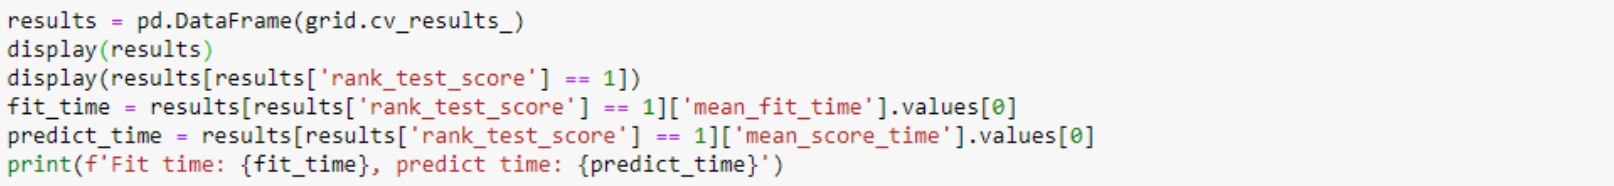
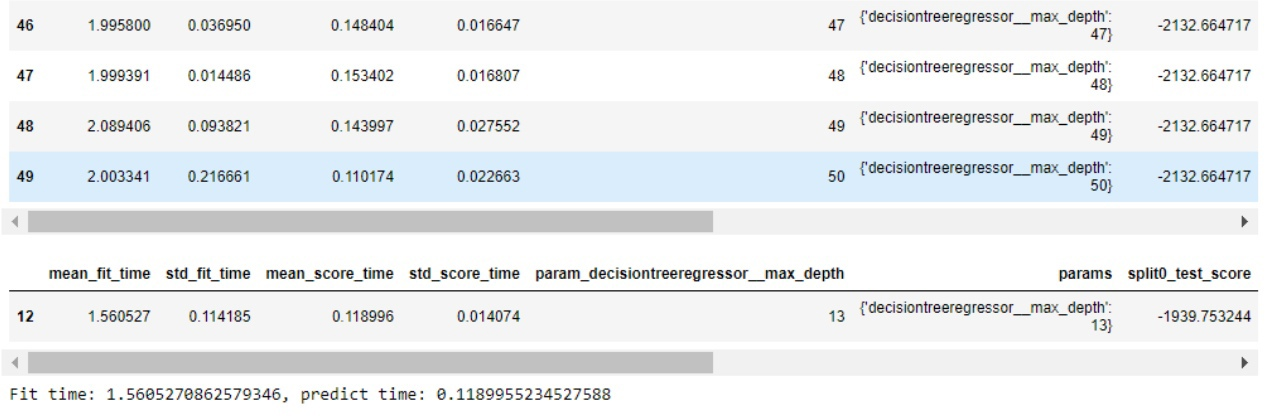
    
    
Дальше как и в первом варианте все сводится в табличку и делается проверка лучшей модели на тестовой выборке)  
    
----  
    
Давай так сделаем с каждой моделькой! Буду ждать обратной связи и всегда рад вопросам)
    
</div>


Если оценить каждую интересующую нас метрику - время обучения, время предсказания, метрика для сравнения моделей, то получается следующая картина:

LGB - 234.24 | 73.21 | -1517.58

RFR - 48.64 | 0.27 | -2586

Время обучение у RFR в 5 раза короче, время предсказания в 271 раза короче, но метрика сравнения на ~1000 пунктов меньше чем у LGB. Хотя RFR обучается и предсказывает намного быстрее чем LGB, требования закачика - RMSE ниже 2500. Поэтому выбирается LGB для дальнейшей проверки на тестовой выборке.  

In [86]:
# проверка на тестовых данных
preds_lgb_model_test = gsearch_lgb.predict(x_test)
rmse_lgb_test = np.sqrt(mean_squared_error(y_test, preds_lgb_model_test))
print(" RMSE: %f" % (rmse_lgb_test))

 RMSE: 1863.041242



<div class="alert alert-block alert-warning"; style="border-left: 6px solid orange">
<b>Итоговый комментарий ревьюера 2 ⚠️</b>
       
Продолжаем работу над проектом, осталось совсем чуть-чуть, буду ждать)
    
</div>


## Общий вывод

Были проанализированы данные сервиса по продаже автомобилей с пробегом «Не бит, не крашен», которое разрабатывает приложение, чтобы привлечь новых клиентов. В нём можно будет узнать рыночную стоимость своего автомобиля. Данные были проанализиорованы - найдены и удалены аномальные значения и неинформативные признаки, также были заполнены пустые значения. После разделения данных на тренировочную и тестовую выборки категориальные признаки были перекодированы. Были созданы 2 модели - градиентный бустинг и случайный лес. RMSE на тренировочных данных оказался намного лучше у бустинга - 1517 против 2586 у леса. Однако по оценке времени обучения и времени предсказания случайный лес намного опередил бустинг. Но так как требованием заказчика было RMSE ниже 2500 то был выбран бустинг. Во время проверки на тестовых данных переобучение или недообучение не подтвердилось - RMSE равен 1863 (1517 было на тренировочных данных).

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Итоговый комментарий ревьюера 3 ✔️</b>
       
Теперь все отлично, спасибо за проделанную работу, можем двигаться дальше, успехов!)
    
</div>


## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнена загрузка и подготовка данных
- [ ]  Выполнено обучение моделей
- [ ]  Есть анализ скорости работы и качества моделей